# 데이터 출처

https://data.world/ 의 Austin Animal Shelter Adoption Predictions 데이터를 사용
- https://data.world/rdowns26/austin-animal-shelter

# 데이터 불러오기

In [93]:
import pandas as pd

df = pd.read_csv('https://query.data.world/s/trchy24npnn5qu7ltohvnsmriicl7x?dws=00000')

In [94]:
df

,Unnamed: 0,Animal ID,Name_intake,DateTime_intake,MonthYear_intake,Found_Location,Intake_Type,IntakeCondition,Animal_Type_intake,Sex,...,beagle,terrier,boxer,poodle,rottweiler,dachshund,chihuahua,pit bull,DateTime_length,Days_length
0,0,A730601,NaN,2016-07-07 12:11:00,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,...,0,0,0,0,0,0,0,0,0 days 20:49:00.000000000,0-7 days
1,1,A683644,*Zoey,2014-07-13 11:02:00,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,...,0,0,0,0,0,0,0,0,115 days 23:04:00.000000000,12 weeks - 6 months
2,2,A676515,Rico,2014-04-11 08:45:00,04/11/2014 08:45:00 AM,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,...,0,0,0,0,0,0,0,1,3 days 09:53:00.000000000,0-7 days
3,3,A742953,NaN,2017-01-31 13:30:00,01/31/2017 01:30:00 PM,S Hwy 183 And Thompson Lane in Austin (TX),Stray,Normal,Dog,Intact Male,...,0,0,0,0,0,0,0,0,4 days 00:47:00.000000000,0-7 days
4,4,A679549,*Gilbert,2014-05-22 15:43:00,05/22/2014 03:43:00 PM,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,...,0,0,0,0,0,0,0,0,24 days 22:11:00.000000000,3-6 weeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76972,76972,A746725,NaN,2017-04-08 11:28:00,04/08/2017 11:28:00 AM,Austin (TX),Stray,Normal,Cat,Unknown,...,0,0,0,0,0,0,0,0,0 days 00:14:00.000000000,0-7 days
76973,76973,A746689,Marylin,2017-04-07 12:36:00,04/07/2017 12:36:00 PM,Sweet Leaf And St Patricks in Pflugerville (TX),Stray,Normal,Dog,Spayed Female,...,0,0,0,0,0,0,1,0,0 days 22:56:00.000000000,0-7 days
76974,76974,A746466,Wilson Fitzg,2017-04-03 15:02:00,04/03/2017 03:02:00 PM,4858 Yager Ln in Travis (TX),Stray,Normal,Dog,Intact Male,...,0,0,0,0,0,0,0,0,4 days 21:19:00.000000000,0-7 days
76975,76975,A746072,Ace,2017-03-28 16:49:00,03/28/2017 04:49:00 PM,9318 Ih 35 in Austin (TX),Stray,Normal,Dog,Neutered Male,...,0,0,0,0,0,0,0,0,4 days 02:01:00.000000000,0-7 days


# 전처리 (추출)

개와 고양이 데이터의 수를 확인

In [95]:
df[(df["Animal_Type_intake"]=="Dog")|(df["Animal_Type_intake"]=="Cat")]["Animal_Type_intake"].value_counts()

Dog    48097
Cat    25125
Name: Animal_Type_intake, dtype: int64

개의 데이터만 추출

In [96]:
dog_df = df[df["Animal_Type_intake"]=="Dog"]

In [97]:
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48097 entries, 1 to 76976
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          48097 non-null  int64 
 1   Animal ID           48097 non-null  object
 2   Name_intake         42416 non-null  object
 3   DateTime_intake     48097 non-null  object
 4   MonthYear_intake    48097 non-null  object
 5   Found_Location      48097 non-null  object
 6   Intake_Type         48097 non-null  object
 7   IntakeCondition     48097 non-null  object
 8   Animal_Type_intake  48097 non-null  object
 9   Sex                 48096 non-null  object
 10  Age                 48097 non-null  object
 11  Breed_intake        48097 non-null  object
 12  Color_intake        48097 non-null  object
 13  Name_outcome        42416 non-null  object
 14  DateTime_outcome    48097 non-null  object
 15  MonthYear_outcome   48097 non-null  object
 16  Outcome_Type        48

Sex_upon_Outcome 항목의 값 분포 확인

In [98]:
dog_df["Sex_upon_Outcome"].value_counts()

Neutered Male    21865
Spayed Female    18373
Intact Male       4231
Intact Female     3456
Unknown            170
Name: Sex_upon_Outcome, dtype: int64

성별과 관련된 항목들에 결측치가 있으면 제거

In [99]:
dog_df.dropna(subset=["Sex", "Sex_upon_Outcome", "gender_intake", "gender_outcome"], inplace=True)

In [100]:
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47925 entries, 1 to 76976
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          47925 non-null  int64 
 1   Animal ID           47925 non-null  object
 2   Name_intake         42394 non-null  object
 3   DateTime_intake     47925 non-null  object
 4   MonthYear_intake    47925 non-null  object
 5   Found_Location      47925 non-null  object
 6   Intake_Type         47925 non-null  object
 7   IntakeCondition     47925 non-null  object
 8   Animal_Type_intake  47925 non-null  object
 9   Sex                 47925 non-null  object
 10  Age                 47925 non-null  object
 11  Breed_intake        47925 non-null  object
 12  Color_intake        47925 non-null  object
 13  Name_outcome        42394 non-null  object
 14  DateTime_outcome    47925 non-null  object
 15  MonthYear_outcome   47925 non-null  object
 16  Outcome_Type        47

퇴소 유형이 입양 또는 안락사인 데이터만 추출
- 다른 보호소로 이동되었거나, 주인이 찾아간 경우 등을 배제

In [101]:
adopt_type_df = dog_df[(dog_df["Outcome_Type"]=="Adoption")|(dog_df["Outcome_Type"]=="Euthanasia")]

다른 항목과 정보가 중목되거나 목표와 관련이 없을 것으로 예상되는 항목들은 제거

In [102]:
adopt_type_df.drop(["Unnamed: 0", "Animal ID", "Found_Location", "Intake_Type",
                    "Animal_Type_intake", "Outcome_Subtype", "gender_intake",
                    "fixed_intake", "fixed_changed", "Age_Bucket", "retriever",
                    "shepherd", "beagle", "terrier", "boxer", "poodle",
                    "rottweiler", "dachshund", "chihuahua", "pit bull",
                    "Days_length", "Name_intake", "Name_outcome",
                    "DateTime_intake", "DateTime_outcome","Age", "Color_intake",
                    "Sex", "Sex_upon_Outcome"], axis=1, inplace=True)

추출된 칼럼들

In [103]:
adopt_type_df.columns

Index(['MonthYear_intake', 'IntakeCondition', 'Breed_intake',
       'MonthYear_outcome', 'Outcome_Type', 'Age_upon_Outcome',
       'gender_outcome', 'fixed_outcome', 'DateTime_length'],
      dtype='object')

In [104]:
adopt_type_df

,MonthYear_intake,IntakeCondition,Breed_intake,MonthYear_outcome,Outcome_Type,Age_upon_Outcome,gender_outcome,fixed_outcome,DateTime_length
1,07/13/2014 11:02:00 AM,Nursing,Border Collie Mix,11/06/2014 10:06:00 AM,Adoption,4 months,Female,Spayed,115 days 23:04:00.000000000
11,11/15/2014 03:18:00 PM,Normal,Pit Bull Mix,11/21/2014 06:55:00 PM,Adoption,5 months,Male,Neutered,6 days 03:37:00.000000000
20,11/10/2015 12:49:00 PM,Normal,Boxer/Labrador Retriever,12/23/2015 05:04:00 PM,Adoption,2 years,Female,Spayed,43 days 04:15:00.000000000
25,02/21/2014 12:22:00 PM,Normal,Pit Bull Mix,03/19/2014 03:17:00 PM,Euthanasia,3 years,Male,Intact,26 days 02:55:00.000000000
27,11/04/2016 12:09:00 PM,Normal,Yorkshire Terrier Mix,11/08/2016 06:16:00 PM,Adoption,10 months,Female,Spayed,4 days 06:07:00.000000000
...,...,...,...,...,...,...,...,...,...
76962,10/31/2016 06:44:00 AM,Normal,Chihuahua Shorthair Mix,11/04/2016 05:09:00 PM,Adoption,4 months,Female,Spayed,4 days 10:25:00.000000000
76969,04/03/2017 03:02:00 PM,Normal,Basset Hound Mix,04/07/2017 06:56:00 PM,Adoption,2 months,Male,Neutered,4 days 03:54:00.000000000
76974,04/03/2017 03:02:00 PM,Normal,Basset Hound Mix,04/08/2017 12:21:00 PM,Adoption,2 months,Male,Neutered,4 days 21:19:00.000000000
76975,03/28/2017 04:49:00 PM,Normal,German Shepherd Mix,04/01/2017 06:50:00 PM,Adoption,2 years,Male,Neutered,4 days 02:01:00.000000000


In [105]:
adopt_type_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23072 entries, 1 to 76976
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MonthYear_intake   23072 non-null  object
 1   IntakeCondition    23072 non-null  object
 2   Breed_intake       23072 non-null  object
 3   MonthYear_outcome  23072 non-null  object
 4   Outcome_Type       23072 non-null  object
 5   Age_upon_Outcome   23072 non-null  object
 6   gender_outcome     23072 non-null  object
 7   fixed_outcome      23072 non-null  object
 8   DateTime_length    23072 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


복사

In [106]:
data_df = adopt_type_df.copy()

# 전처리 (가공)

- 들어올때상태
    - One-Hot Encoding
- 성별
    - One-Hot Encoding
    - 중성화 여부 칼럼 추가
- 나이
    - 개월로 통일
- 들어온 월, 나간 월
    - 년 기준으로 표시
- 품종
    - One-Hot Encoding
    - 몸무게 칼럼 추가하고 종별 평균 몸무게로 채움
        - https://tmfilho.github.io/akcdata/
- 머문시간
    - 음수인 것 제거

## Condition

- 보호소로 들어올 당시 건강 상태에 관한 정보를 담고 있다
- 각 상태를 One-Hot Encoding 처리

구성 확인

In [107]:
data_df["IntakeCondition"].value_counts()

Normal      21453
Injured       855
Sick          383
Nursing       219
Aged          109
Other          37
Pregnant       14
Feral           2
Name: IntakeCondition, dtype: int64

pandas.get_dummies() 이용하여 One-Hot Encoding

In [108]:
condition_dummy = pd.get_dummies(data_df["IntakeCondition"], prefix="Condition")
condition_dummy

,Condition_Aged,Condition_Feral,Condition_Injured,Condition_Normal,Condition_Nursing,Condition_Other,Condition_Pregnant,Condition_Sick
1,0,0,0,0,1,0,0,0
11,0,0,0,1,0,0,0,0
20,0,0,0,1,0,0,0,0
25,0,0,0,1,0,0,0,0
27,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
76962,0,0,0,1,0,0,0,0
76969,0,0,0,1,0,0,0,0
76974,0,0,0,1,0,0,0,0
76975,0,0,0,1,0,0,0,0


pandas.concat() 을 사용하여 기존 데이터과 결합 ("IntakeCondition" 항목은 제거)

In [109]:
data_df = pd.concat([data_df.drop("IntakeCondition", axis=1), condition_dummy], axis=1)
data_df

,MonthYear_intake,Breed_intake,MonthYear_outcome,Outcome_Type,Age_upon_Outcome,gender_outcome,fixed_outcome,DateTime_length,Condition_Aged,Condition_Feral,Condition_Injured,Condition_Normal,Condition_Nursing,Condition_Other,Condition_Pregnant,Condition_Sick
1,07/13/2014 11:02:00 AM,Border Collie Mix,11/06/2014 10:06:00 AM,Adoption,4 months,Female,Spayed,115 days 23:04:00.000000000,0,0,0,0,1,0,0,0
11,11/15/2014 03:18:00 PM,Pit Bull Mix,11/21/2014 06:55:00 PM,Adoption,5 months,Male,Neutered,6 days 03:37:00.000000000,0,0,0,1,0,0,0,0
20,11/10/2015 12:49:00 PM,Boxer/Labrador Retriever,12/23/2015 05:04:00 PM,Adoption,2 years,Female,Spayed,43 days 04:15:00.000000000,0,0,0,1,0,0,0,0
25,02/21/2014 12:22:00 PM,Pit Bull Mix,03/19/2014 03:17:00 PM,Euthanasia,3 years,Male,Intact,26 days 02:55:00.000000000,0,0,0,1,0,0,0,0
27,11/04/2016 12:09:00 PM,Yorkshire Terrier Mix,11/08/2016 06:16:00 PM,Adoption,10 months,Female,Spayed,4 days 06:07:00.000000000,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76962,10/31/2016 06:44:00 AM,Chihuahua Shorthair Mix,11/04/2016 05:09:00 PM,Adoption,4 months,Female,Spayed,4 days 10:25:00.000000000,0,0,0,1,0,0,0,0
76969,04/03/2017 03:02:00 PM,Basset Hound Mix,04/07/2017 06:56:00 PM,Adoption,2 months,Male,Neutered,4 days 03:54:00.000000000,0,0,0,1,0,0,0,0
76974,04/03/2017 03:02:00 PM,Basset Hound Mix,04/08/2017 12:21:00 PM,Adoption,2 months,Male,Neutered,4 days 21:19:00.000000000,0,0,0,1,0,0,0,0
76975,03/28/2017 04:49:00 PM,German Shepherd Mix,04/01/2017 06:50:00 PM,Adoption,2 years,Male,Neutered,4 days 02:01:00.000000000,0,0,0,1,0,0,0,0


## Gender
- "gender_outcome", "fixed_outcome"는 각각 퇴소 당시의 성별 상태("Male", "Female")와 중성화 정보를 포함한 최종적인 성별 상태의 정보를 제공한다
- 성별은 One-Hot Encoding
- 중성화 여부는 항목을 추가하여 0, 1로 표현

In [110]:
print(data_df["gender_outcome"].unique())
print(data_df["fixed_outcome"].unique())

['Female' 'Male']
['Spayed' 'Neutered' 'Intact']


- "Spayed": 중성화된 암컷
- "Neutered": 중성화된 수컷
- "Intact": 중성화 하지 않음

성별 One-Hot Encoding

In [111]:
gender_dummy = pd.get_dummies(data_df["gender_outcome"])
gender_dummy

,Female,Male
1,1,0
11,0,1
20,1,0
25,0,1
27,1,0
...,...,...
76962,1,0
76969,0,1
76974,0,1
76975,0,1


기존 데이터에 결합하고 "gender_outcome"항목 제거

In [112]:
data_df = pd.concat([data_df.drop("gender_outcome", axis=1), gender_dummy], axis=1)
data_df

,MonthYear_intake,Breed_intake,MonthYear_outcome,Outcome_Type,Age_upon_Outcome,fixed_outcome,DateTime_length,Condition_Aged,Condition_Feral,Condition_Injured,Condition_Normal,Condition_Nursing,Condition_Other,Condition_Pregnant,Condition_Sick,Female,Male
1,07/13/2014 11:02:00 AM,Border Collie Mix,11/06/2014 10:06:00 AM,Adoption,4 months,Spayed,115 days 23:04:00.000000000,0,0,0,0,1,0,0,0,1,0
11,11/15/2014 03:18:00 PM,Pit Bull Mix,11/21/2014 06:55:00 PM,Adoption,5 months,Neutered,6 days 03:37:00.000000000,0,0,0,1,0,0,0,0,0,1
20,11/10/2015 12:49:00 PM,Boxer/Labrador Retriever,12/23/2015 05:04:00 PM,Adoption,2 years,Spayed,43 days 04:15:00.000000000,0,0,0,1,0,0,0,0,1,0
25,02/21/2014 12:22:00 PM,Pit Bull Mix,03/19/2014 03:17:00 PM,Euthanasia,3 years,Intact,26 days 02:55:00.000000000,0,0,0,1,0,0,0,0,0,1
27,11/04/2016 12:09:00 PM,Yorkshire Terrier Mix,11/08/2016 06:16:00 PM,Adoption,10 months,Spayed,4 days 06:07:00.000000000,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76962,10/31/2016 06:44:00 AM,Chihuahua Shorthair Mix,11/04/2016 05:09:00 PM,Adoption,4 months,Spayed,4 days 10:25:00.000000000,0,0,0,1,0,0,0,0,1,0
76969,04/03/2017 03:02:00 PM,Basset Hound Mix,04/07/2017 06:56:00 PM,Adoption,2 months,Neutered,4 days 03:54:00.000000000,0,0,0,1,0,0,0,0,0,1
76974,04/03/2017 03:02:00 PM,Basset Hound Mix,04/08/2017 12:21:00 PM,Adoption,2 months,Neutered,4 days 21:19:00.000000000,0,0,0,1,0,0,0,0,0,1
76975,03/28/2017 04:49:00 PM,German Shepherd Mix,04/01/2017 06:50:00 PM,Adoption,2 years,Neutered,4 days 02:01:00.000000000,0,0,0,1,0,0,0,0,0,1


중성화 정보가 "Intact"이면 0, 아니면 1을 기록한 "Spayed/Neutered"항목을 생성한다

("fixed_outcome" 항목 제거)

In [113]:
data_df["Spayed/Neutered"] = data_df["fixed_outcome"].apply(lambda con: 0 if con=="Intact" else 1)
data_df.drop("fixed_outcome", axis=1, inplace=True)
data_df

,MonthYear_intake,Breed_intake,MonthYear_outcome,Outcome_Type,Age_upon_Outcome,DateTime_length,Condition_Aged,Condition_Feral,Condition_Injured,Condition_Normal,Condition_Nursing,Condition_Other,Condition_Pregnant,Condition_Sick,Female,Male,Spayed/Neutered
1,07/13/2014 11:02:00 AM,Border Collie Mix,11/06/2014 10:06:00 AM,Adoption,4 months,115 days 23:04:00.000000000,0,0,0,0,1,0,0,0,1,0,1
11,11/15/2014 03:18:00 PM,Pit Bull Mix,11/21/2014 06:55:00 PM,Adoption,5 months,6 days 03:37:00.000000000,0,0,0,1,0,0,0,0,0,1,1
20,11/10/2015 12:49:00 PM,Boxer/Labrador Retriever,12/23/2015 05:04:00 PM,Adoption,2 years,43 days 04:15:00.000000000,0,0,0,1,0,0,0,0,1,0,1
25,02/21/2014 12:22:00 PM,Pit Bull Mix,03/19/2014 03:17:00 PM,Euthanasia,3 years,26 days 02:55:00.000000000,0,0,0,1,0,0,0,0,0,1,0
27,11/04/2016 12:09:00 PM,Yorkshire Terrier Mix,11/08/2016 06:16:00 PM,Adoption,10 months,4 days 06:07:00.000000000,0,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76962,10/31/2016 06:44:00 AM,Chihuahua Shorthair Mix,11/04/2016 05:09:00 PM,Adoption,4 months,4 days 10:25:00.000000000,0,0,0,1,0,0,0,0,1,0,1
76969,04/03/2017 03:02:00 PM,Basset Hound Mix,04/07/2017 06:56:00 PM,Adoption,2 months,4 days 03:54:00.000000000,0,0,0,1,0,0,0,0,0,1,1
76974,04/03/2017 03:02:00 PM,Basset Hound Mix,04/08/2017 12:21:00 PM,Adoption,2 months,4 days 21:19:00.000000000,0,0,0,1,0,0,0,0,0,1,1
76975,03/28/2017 04:49:00 PM,German Shepherd Mix,04/01/2017 06:50:00 PM,Adoption,2 years,4 days 02:01:00.000000000,0,0,0,1,0,0,0,0,0,1,1


## Age (month)
- 연령 정보를 담고 있으나 days, weeks, month, months, year, years등 표현 방식이 다양하다
- 개월 단위로 통일

In [114]:
data_df["Age_upon_Outcome"].apply(lambda d: d.split(" ")[1]).unique()

array(['months', 'years', 'year', 'month', 'weeks', 'days'], dtype=object)

개월 단위로 치환하는 함수

In [115]:
def get_months(num:str, unit:str):
    if unit == "year" or unit == "years":
        return int(num) * 12
    elif unit == "month" or unit == "months":
        return int(num)
    elif unit == "week" or unit == "weeks":
        return int(num) / 4
    elif unit == "day" or unit == "days":
        return int(num) / 30

가장 앞부분의 숫자 정보와 뒤따르는 단위 정보를 "개월수로 치환하는 함수"를 통해 치환하여 "Age_Month"항목을 만듦

("Age_upon_Outcome" 항목 제거)

In [116]:
data_df["Age_Month"] = data_df["Age_upon_Outcome"].apply(lambda d: get_months(d.split()[0], d.split()[1]))
data_df.drop("Age_upon_Outcome", axis=1, inplace=True)
data_df

,MonthYear_intake,Breed_intake,MonthYear_outcome,Outcome_Type,DateTime_length,Condition_Aged,Condition_Feral,Condition_Injured,Condition_Normal,Condition_Nursing,Condition_Other,Condition_Pregnant,Condition_Sick,Female,Male,Spayed/Neutered,Age_Month
1,07/13/2014 11:02:00 AM,Border Collie Mix,11/06/2014 10:06:00 AM,Adoption,115 days 23:04:00.000000000,0,0,0,0,1,0,0,0,1,0,1,4.00
11,11/15/2014 03:18:00 PM,Pit Bull Mix,11/21/2014 06:55:00 PM,Adoption,6 days 03:37:00.000000000,0,0,0,1,0,0,0,0,0,1,1,5.00
20,11/10/2015 12:49:00 PM,Boxer/Labrador Retriever,12/23/2015 05:04:00 PM,Adoption,43 days 04:15:00.000000000,0,0,0,1,0,0,0,0,1,0,1,24.00
25,02/21/2014 12:22:00 PM,Pit Bull Mix,03/19/2014 03:17:00 PM,Euthanasia,26 days 02:55:00.000000000,0,0,0,1,0,0,0,0,0,1,0,36.00
27,11/04/2016 12:09:00 PM,Yorkshire Terrier Mix,11/08/2016 06:16:00 PM,Adoption,4 days 06:07:00.000000000,0,0,0,1,0,0,0,0,1,0,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76962,10/31/2016 06:44:00 AM,Chihuahua Shorthair Mix,11/04/2016 05:09:00 PM,Adoption,4 days 10:25:00.000000000,0,0,0,1,0,0,0,0,1,0,1,4.00
76969,04/03/2017 03:02:00 PM,Basset Hound Mix,04/07/2017 06:56:00 PM,Adoption,4 days 03:54:00.000000000,0,0,0,1,0,0,0,0,0,1,1,2.00
76974,04/03/2017 03:02:00 PM,Basset Hound Mix,04/08/2017 12:21:00 PM,Adoption,4 days 21:19:00.000000000,0,0,0,1,0,0,0,0,0,1,1,2.00
76975,03/28/2017 04:49:00 PM,German Shepherd Mix,04/01/2017 06:50:00 PM,Adoption,4 days 02:01:00.000000000,0,0,0,1,0,0,0,0,0,1,1,24.00


## MonthYear_intake / MonthYear_outcome
- 입소, 퇴소 당시 월 정보와 년 정보를 담고 있다
- 입소와 퇴소 당시의 월 정보만 추출하여 입양에 영향을 주는지 확인
- 12로 나누어 0 ~ 1 사이 값으로 표현

In [117]:
data_df["MonthYear_intake"] = data_df["MonthYear_intake"].apply(lambda d: int(d.split("/")[0])/12)
data_df["MonthYear_outcome"] = data_df["MonthYear_outcome"].apply(lambda d: int(d.split("/")[0])/12)
data_df

,MonthYear_intake,Breed_intake,MonthYear_outcome,Outcome_Type,DateTime_length,Condition_Aged,Condition_Feral,Condition_Injured,Condition_Normal,Condition_Nursing,Condition_Other,Condition_Pregnant,Condition_Sick,Female,Male,Spayed/Neutered,Age_Month
1,0.58,Border Collie Mix,0.92,Adoption,115 days 23:04:00.000000000,0,0,0,0,1,0,0,0,1,0,1,4.00
11,0.92,Pit Bull Mix,0.92,Adoption,6 days 03:37:00.000000000,0,0,0,1,0,0,0,0,0,1,1,5.00
20,0.92,Boxer/Labrador Retriever,1.00,Adoption,43 days 04:15:00.000000000,0,0,0,1,0,0,0,0,1,0,1,24.00
25,0.17,Pit Bull Mix,0.25,Euthanasia,26 days 02:55:00.000000000,0,0,0,1,0,0,0,0,0,1,0,36.00
27,0.92,Yorkshire Terrier Mix,0.92,Adoption,4 days 06:07:00.000000000,0,0,0,1,0,0,0,0,1,0,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76962,0.83,Chihuahua Shorthair Mix,0.92,Adoption,4 days 10:25:00.000000000,0,0,0,1,0,0,0,0,1,0,1,4.00
76969,0.33,Basset Hound Mix,0.33,Adoption,4 days 03:54:00.000000000,0,0,0,1,0,0,0,0,0,1,1,2.00
76974,0.33,Basset Hound Mix,0.33,Adoption,4 days 21:19:00.000000000,0,0,0,1,0,0,0,0,0,1,1,2.00
76975,0.25,German Shepherd Mix,0.33,Adoption,4 days 02:01:00.000000000,0,0,0,1,0,0,0,0,0,1,1,24.00


## DateTime_length
- 입양이나 안락사가 결정되기 까지 보호소에서 지낸 날의 수가 담겨있다
- 며칠을 보냈는지 숫자만 추출
- 데이터가 음수인 경우는 제거했다

In [118]:
data_df["DateTime_length"] = data_df["DateTime_length"].apply(lambda x: int(x.split(" ")[0]))

In [119]:
data_df.drop(data_df[data_df["DateTime_length"]<0].index, axis=0, inplace=True)

## Breed
- 대망의 "종" 항목
- 개들의 "종" 정보가 담겨있다
- 종 명칭이 수치적인 대소 관계는 없을 것이라 생각하기 때문에 One-Hot Encoding
- 종별 평균 무게와 체고(높이) 정보를 추가하여 견종의 크기가 주는 영향을 확인하려 했다
    - https://tmfilho.github.io/akcdata/
    - Kennel Club이라 불리는 각종 종표준을 정의하는 단체들에서 인정하는 종이 달라서 종별 정보를 얻기 위해 wikipedia 를 같이 참고했다

다수의 개들이 순종이 아닌 것으로 나타났기 때문에 먼저 제시되는 종의 표준을 따르기로 했다

In [120]:
data_df["Breed_intake"].apply(lambda b: b.split("/")[0].replace(" Mix", "")).unique()

array(['Border Collie', 'Pit Bull', 'Boxer', 'Yorkshire Terrier',
       'Bruss Griffon', 'Siberian Husky', 'German Shepherd', 'Rottweiler',
       'Australian Cattle Dog', 'Vizsla', 'Jack Russell Terrier',
       'Bull Terrier', 'Pointer', 'Australian Shepherd', 'Border Terrier',
       'Labrador Retriever', 'Carolina Dog', 'Weimaraner',
       'Chihuahua Shorthair', 'Great Pyrenees', 'Miniature Poodle',
       'Rat Terrier', 'Chow Chow', 'Golden Retriever', 'American Bulldog',
       'Queensland Heeler', 'Anatol Shepherd', 'Pharaoh Hound',
       'Miniature Pinscher', 'Miniature Schnauzer', 'Standard Schnauzer',
       'Chihuahua Longhair', 'Redbone Hound', 'Doberman Pinsch',
       'Dachshund Wirehair', 'Manchester Terrier', 'Blue Lacy',
       'Catahoula', 'Collie Smooth', 'Shih Tzu', 'Dachshund', 'Beauceron',
       'Feist', 'Dachshund Longhair', 'Whippet', 'Great Dane',
       'Staffordshire', 'Papillon', 'Schipperke', 'Akita', 'Plott Hound',
       'Cardigan Welsh Corgi', 'Harri

종별 정보 데이터
- https://tmfilho.github.io/akcdata/

In [121]:
breed_df = pd.read_csv("https://raw.githubusercontent.com/tmfilho/akcdata/master/data/akc-data-latest.csv")

In [122]:
breed_df[breed_df['Unnamed: 0']=="Border Collie"]

,Unnamed: 0,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
46,Border Collie,"Borders are athletic, medium-sized herders sta...","Affectionate, Smart, Energetic",35,45.72,55.88,13.61,24.95,12.00,15.00,...,0.60,2-3 Times a Week Brushing,0.60,Seasonal,1.00,Needs Lots of Activity,1.00,Eager to Please,0.40,Reserved with Strangers


In [123]:
breed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   277 non-null    object 
 1   description                  277 non-null    object 
 2   temperament                  276 non-null    object 
 3   popularity                   198 non-null    object 
 4   min_height                   277 non-null    float64
 5   max_height                   277 non-null    float64
 6   min_weight                   275 non-null    float64
 7   max_weight                   275 non-null    float64
 8   min_expectancy               274 non-null    float64
 9   max_expectancy               274 non-null    float64
 10  group                        277 non-null    object 
 11  grooming_frequency_value     270 non-null    float64
 12  grooming_frequency_category  270 non-null    object 
 13  shedding_value      

보호소 데이터에 존재하는 종 정보 중에서 AKC의 종 표준 데이터에 포함되지 않는 종들을 확인

In [124]:
set(data_df["Breed_intake"].apply(lambda b: b.split("/")[0].replace(" Mix", "")).unique()) - set(breed_df["Unnamed: 0"].unique())

{'Akbash',
 'Alaskan Husky',
 'American Eskimo',
 'American Pit Bull Terrier',
 'Anatol Shepherd',
 'Bedlington Terr',
 'Black',
 'Black Mouth Cur',
 'Blue Lacy',
 'Bluetick Hound',
 'Boykin Span',
 'Bruss Griffon',
 'Bull Terrier Miniature',
 'Catahoula',
 'Cavalier Span',
 'Chesa Bay Retr',
 'Chihuahua Longhair',
 'Chihuahua Shorthair',
 'Chinese Sharpei',
 'Collie Rough',
 'Collie Smooth',
 'Coton De Tulear',
 'Dachshund Longhair',
 'Dachshund Stan',
 'Dachshund Wirehair',
 'Doberman Pinsch',
 'Dogue De Bordeaux',
 'Eng Toy Spaniel',
 'English Bulldog',
 'English Coonhound',
 'English Pointer',
 'English Shepherd',
 'Feist',
 'Flat Coat Retriever',
 'German Shepherd',
 'German Shorthair Pointer',
 'Glen Of Imaal',
 'Grand Basset Griffon Vendeen',
 'Jack Russell Terrier',
 'Landseer',
 'Lowchen',
 'Manchester Terrier',
 'Mexican Hairless',
 'Miniature Poodle',
 'Old English Bulldog',
 'Patterdale Terr',
 'Pbgv',
 'Picardy Sheepdog',
 'Pit Bull',
 'Podengo Pequeno',
 'Port Water Dog',

많다...

몇개인지 확인

In [125]:
len(set(data_df["Breed_intake"].apply(lambda b: b.split("/")[0].replace(" Mix", "")).unique()) - set(breed_df["Unnamed: 0"].unique()))

66

표준된 종명과 다르게 표기된 경우 AKC의 표준으로 바꾸어주기 위한 dict를 생성
- AKC에서 인정하는 종이 아닌 경우 wikipedia의 정보를 참고

In [126]:
breed_map = {
    "American Eskimo": "American Eskimo Dog",
    "Anatol Shepherd": "Anatolian Shepherd Dog",
    "Bedlington Terr": "Bedlington Terrier",
    "Bedlington Terr": "Bluetick Coonhound",
    "Boykin Span": "Boykin Spaniel",
    "Bruss Griffon": "Brussels Griffon",
    "Bluetick Hound": "Bluetick Coonhound",
    "Bull Terrier Miniature": "Miniature Bull Terrier",
    "Catahoula": "Catahoula Leopard Dog",
    "Cavalier Span": "Cavalier King Charles Spaniel",
    "Chesa Bay Retr": "Chesapeake Bay Retriever",
    "Chihuahua Longhair": "Chihuahua",
    "Chihuahua Shorthair": "Chihuahua",
    "Chinese Sharpei": "Chinese Shar-Pei",
    "Coton De Tulear": "Coton de Tulear",
    "Collie Rough": "Collie",
    "Collie Smooth": "Collie",
    "Dachshund Longhair": "Dachshund",
    "Dachshund Stan": "Dachshund",
    "Dachshund Wirehair": "Dachshund",
    "Doberman Pinsch": "Doberman Pinscher",
    "Dogue De Bordeaux": "Dogue de Bordeaux",
    "Eng Toy Spaniel": "English Toy Spaniel",
    "English Bulldog": "Bulldog",
    "English Coonhound": "American English Coonhound",
    "English Pointer": "Pointer",
    "Flat Coat Retriever": "Flat-Coated Retriever",
    "German Shepherd": "German Shepherd Dog",
    "German Shorthair Pointer": "German Shorthaired Pointer",
    "Glen Of Imaal": "Glen of Imaal Terrier",
    "Grand Basset Griffon Vendeen": "Grand Basset Griffon Vendéen",
    "Jack Russell Terrier": "Russell Terrier",
    "Landseer": "Newfoundland",
    "Lowchen": "Löwchen",
    "Manchester Terrier": "Manchester Terrier (Standard)",
    "Mexican Hairless": "Xoloitzcuintli",
    "Miniature Poodle": "Poodle (Miniature)",
    "Pbgv": "Petit Basset Griffon Vendéen",
    "Picardy Sheepdog": "Berger Picard",
    "Podengo Pequeno": "Portuguese Podengo Pequeno",
    "Port Water Dog": "Portuguese Water Dog",
    "Presa Canario": "Perro de Presa Canario",
    'Queensland Heeler': "Australian Cattle Dog",
    "Redbone Hound": "Redbone Coonhound",
    "Rhod Ridgeback": "Rhodesian Ridgeback",
    "Schnauzer Giant": "Giant Schnauzer",
    "Sealyham Terr": "Sealyham Terrier",
    "St. Bernard Rough Coat": "Saint Bernard",
    "St. Bernard Smooth Coat": "Saint Bernard",
    "Staffordshire": "American Staffordshire Terrier",
    "Standard Poodle": "Poodle (Standard)",
    "Toy Poodle": "Poodle (Toy)",
    "Treeing Cur": "Treeing Tennessee Brindle",
    'Treeing Tennesse Brindle': "Treeing Tennessee Brindle",
    'West Highland': "West Highland White Terrier",
    "Wire Hair Fox Terrier": "Wire Fox Terrier",

    "Alaskan Husky": "Alaskan Husky",
    "Akbash": "Akbash",
    "American Pit Bull Terrier": "American Pit Bull Terrier",
    "Black Mouth Cur": "Black Mouth Cur",
    "Blue Lacy": "Blue Lacy",
    "English Shepherd": "English Shepherd",
    "Feist": "Feist",
    "Old English Bulldog": "English Bulldog",
    "Patterdale Terr": "Patterdale Terrier",
    "Pit Bull": "American Pit Bull Terrier",
}

AKC에서 인정하지 않는 종들은 직접 추가했다

In [127]:
breed_df.loc[277] = ["Alaskan Husky", pd.NA, pd.NA, pd.NA, 51, 66, 16, 34, 10, 15, pd.NA, 0.6, pd.NA, 0.6, pd.NA, 1.0, pd.NA, 0.6, pd.NA, 1.0, pd.NA]
breed_df.loc[278] = ["Akbash", pd.NA, pd.NA, pd.NA, 69, 86, 41, 64, 10, 12, pd.NA, 0.6, pd.NA, 0.6, pd.NA, 0.4, pd.NA, 0.4, pd.NA, 0.4, pd.NA]
breed_df.loc[279] = ["American Pit Bull Terrier", pd.NA, pd.NA, pd.NA, 43, 54, 13.6, 27.2, 8, 15, pd.NA, 0.2, pd.NA, 0.4, pd.NA, 0.8, pd.NA, 0.8, pd.NA, 0.8, pd.NA]
breed_df.loc[280] = ["American Pit Bull Terrier", pd.NA, pd.NA, pd.NA, 43, 54, 13.6, 27.2, 8, 15, pd.NA, 0.2, pd.NA, 0.4, pd.NA, 0.8, pd.NA, 0.8, pd.NA, 0.8, pd.NA]
breed_df.loc[281] = ["Black Mouth Cur", pd.NA, pd.NA, pd.NA, 41, 64, 20, 45, 12, 18, pd.NA, 0.2, pd.NA, 0.6, pd.NA, 0.8, pd.NA, 0.6, pd.NA, 0.6, pd.NA]
breed_df.loc[282] = ["Blue Lacy", pd.NA, pd.NA, pd.NA, 46, 53, 14, 23, 12, 16, pd.NA, 0.2, pd.NA, 0.6, pd.NA, 0.8, pd.NA, 1.0, pd.NA, 0.4, pd.NA]
breed_df.loc[283] = ["English Shepherd", pd.NA, pd.NA, pd.NA, 46, 58, 18, 28, 10, 14, pd.NA, 0.6, pd.NA, 0.6, pd.NA, 1.0, pd.NA, 0.8, pd.NA, 0.4, pd.NA]
breed_df.loc[284] = ["Feist", pd.NA, pd.NA, pd.NA, 25, 46, 6.8, 14, 15, 18, pd.NA, 0.2, pd.NA, 0.4, pd.NA, 0.8, pd.NA, 0.8, pd.NA, 0.4, pd.NA]
breed_df.loc[285] = ["English Bulldog", pd.NA, pd.NA, pd.NA, 41, 51, 27, 36, 9, 14, pd.NA, 0.4, pd.NA, 0.6, pd.NA, 0.4, pd.NA, 0.8, pd.NA, 0.8, pd.NA]
breed_df.loc[286] = ["Patterdale Terrier", pd.NA, pd.NA, pd.NA, 30, 38, 5, 6, 11, 14, pd.NA, 0.6, pd.NA, 0.4, pd.NA, 0.8, pd.NA, 0.6, pd.NA, 0.8, pd.NA]
breed_df.loc[287] = ["American Pit Bull Terrier", pd.NA, pd.NA, pd.NA, 43, 54, 13.6, 27.2, 8, 15, pd.NA, 0.2, pd.NA, 0.4, pd.NA, 0.8, pd.NA, 0.8, pd.NA, 0.8, pd.NA]

In [128]:
breed_df

,Unnamed: 0,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.18,4.54,12.00,15.00,...,0.60,2-3 Times a Week Brushing,0.60,Seasonal,0.60,Regular Exercise,0.80,Easy Training,1.00,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.68,27.22,12.00,15.00,...,0.80,Daily Brushing,0.20,Infrequent,0.80,Energetic,0.20,May be Stubborn,0.20,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.68,31.75,11.00,14.00,...,0.60,2-3 Times a Week Brushing,0.40,Occasional,0.60,Regular Exercise,1.00,Eager to Please,0.80,Friendly
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,60.96,71.12,31.75,58.97,10.00,13.00,...,0.80,Daily Brushing,0.60,Seasonal,0.80,Energetic,1.00,Eager to Please,0.60,Alert/Responsive
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,58.42,63.50,34.02,38.56,10.00,14.00,...,0.60,2-3 Times a Week Brushing,0.60,Seasonal,0.80,Energetic,0.40,Independent,0.80,Friendly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,English Shepherd,<NA>,<NA>,<NA>,46.00,58.00,18.00,28.00,10.00,14.00,...,0.60,NaN,0.60,NaN,1.00,NaN,0.80,NaN,0.40,NaN
284,Feist,<NA>,<NA>,<NA>,25.00,46.00,6.80,14.00,15.00,18.00,...,0.20,NaN,0.40,NaN,0.80,NaN,0.80,NaN,0.40,NaN
285,English Bulldog,<NA>,<NA>,<NA>,41.00,51.00,27.00,36.00,9.00,14.00,...,0.40,NaN,0.60,NaN,0.40,NaN,0.80,NaN,0.80,NaN
286,Patterdale Terrier,<NA>,<NA>,<NA>,30.00,38.00,5.00,6.00,11.00,14.00,...,0.60,NaN,0.40,NaN,0.80,NaN,0.60,NaN,0.80,NaN


### Cane Corso 몸무게가 비어있음

In [129]:
breed_df[breed_df["Unnamed: 0"]=="Cane Corso"]

,Unnamed: 0,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
65,Cane Corso,At nearly 28 inches at the shoulder and often ...,"Affectionate, Intelligent, Majestic",32,59.69,69.85,0.00,0.00,9.00,12.00,...,0.20,Occasional Bath/Brush,0.40,Occasional,0.80,Energetic,0.60,Agreeable,0.60,Alert/Responsive


In [130]:
breed_df.loc[breed_df["Unnamed: 0"]=="Cane Corso", "min_weight"] = 40
breed_df.loc[breed_df["Unnamed: 0"]=="Cane Corso", "max_weight"] = 50

null값 확인
- min_weight, max_weight는 비어있으면 곤란하다
- 그런데 2개가 비어있다

In [131]:
breed_df.isnull().sum()

Unnamed: 0                      0
description                    11
temperament                    12
popularity                     90
min_height                      0
max_height                      0
min_weight                      2
max_weight                      2
min_expectancy                  3
max_expectancy                  3
group                          11
grooming_frequency_value        7
grooming_frequency_category    18
shedding_value                 20
shedding_category              31
energy_level_value              6
energy_level_category          17
trainability_value             24
trainability_category          35
demeanor_value                 25
demeanor_category              36
dtype: int64

In [132]:
breed_df[breed_df["min_weight"].isnull()]["Unnamed: 0"]

16     Australian Kelpie
244     Spinone Italiano
Name: Unnamed: 0, dtype: object

비어있던 값을 채움

In [133]:
breed_df.loc[breed_df["Unnamed: 0"]=="Australian Kelpie", "min_weight"] = 14
breed_df.loc[breed_df["Unnamed: 0"]=="Australian Kelpie", "max_weight"] = 20

breed_df.loc[breed_df["Unnamed: 0"]=="Spinone Italiano", "min_weight"] = 29
breed_df.loc[breed_df["Unnamed: 0"]=="Spinone Italiano", "max_weight"] = 32

wikipedia 정보 입력

중복되는 행이 있음

In [134]:
len(breed_df["Unnamed: 0"].unique())

286

중복 제거

In [135]:
breed_df.drop_duplicates(["Unnamed: 0"], keep="first", inplace=True)
breed_df.shape

(286, 21)

AKC표준 종명으로 변환하는 함수 생성

In [136]:
def breed_mapping(breed:str) -> str:
    if breed in breed_map.keys():
        return breed_map[breed]
    else:
        return breed

"Breed_intake" 항목을 첫 번째 등장한 종의 AKC 표준명으로 바꾸고 항목명을 "Breed"로 수정

In [137]:
data_df["Breed_intake"] = data_df["Breed_intake"].apply(lambda b: breed_mapping(b.split("/")[0].replace(" Mix", "")))
data_df.rename({"Breed_intake": "Breed"}, axis=1, inplace=True)
data_df

,MonthYear_intake,Breed,MonthYear_outcome,Outcome_Type,DateTime_length,Condition_Aged,Condition_Feral,Condition_Injured,Condition_Normal,Condition_Nursing,Condition_Other,Condition_Pregnant,Condition_Sick,Female,Male,Spayed/Neutered,Age_Month
1,0.58,Border Collie,0.92,Adoption,115,0,0,0,0,1,0,0,0,1,0,1,4.00
11,0.92,American Pit Bull Terrier,0.92,Adoption,6,0,0,0,1,0,0,0,0,0,1,1,5.00
20,0.92,Boxer,1.00,Adoption,43,0,0,0,1,0,0,0,0,1,0,1,24.00
25,0.17,American Pit Bull Terrier,0.25,Euthanasia,26,0,0,0,1,0,0,0,0,0,1,0,36.00
27,0.92,Yorkshire Terrier,0.92,Adoption,4,0,0,0,1,0,0,0,0,1,0,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76960,0.25,Boxer,0.25,Adoption,17,0,0,0,1,0,0,0,0,1,0,1,12.00
76962,0.83,Chihuahua,0.92,Adoption,4,0,0,0,1,0,0,0,0,1,0,1,4.00
76969,0.33,Basset Hound,0.33,Adoption,4,0,0,0,1,0,0,0,0,0,1,1,2.00
76974,0.33,Basset Hound,0.33,Adoption,4,0,0,0,1,0,0,0,0,0,1,1,2.00


"Black"이라고 기록된 종은 표준명을 알 수 없어서 제거

In [138]:
data_df.drop(data_df[data_df["Breed"]=="Black"].index, axis=0, inplace=True)

행들을 제거하며 비어버린 index를 초기화
- 행 기준으로 병합하기 위함

In [139]:
data_df.reset_index(drop=True, inplace=True)

보호소의 종들 중에 등장하지 않았던 종들까지 고려하기 위해 AKC표준을 기준으로 One-Hot Encoding
- 0으로 채워진 종별 항목 생성

In [140]:
zero_df = pd.DataFrame(index=list(range(data_df.shape[0])), columns=breed_df["Unnamed: 0"])
zero_df.fillna(0)
zero_df.shape

(19996, 286)

보호소의 종 정보를 One-Hot Encoding

In [141]:
breed_dummy = pd.get_dummies(data_df["Breed"])
breed_dummy.shape

(19996, 168)

보호소의 종 정보를 기준으로 병합하고 빈 값은 0으로 채움

In [142]:
dummy_df = zero_df.merge(breed_dummy, how="right").fillna(0)
dummy_df

,Affenpinscher,Afghan Hound,Airedale Terrier,Akita,Alaskan Malamute,American Bulldog,American English Coonhound,American Eskimo Dog,American Foxhound,American Hairless Terrier,...,Yorkshire Terrier,Alaskan Husky,Akbash,American Pit Bull Terrier,Black Mouth Cur,Blue Lacy,English Shepherd,Feist,English Bulldog,Patterdale Terrier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


종별 무게, 높이 평균값을 담은 DataFrame 생성

In [143]:
mean_height = breed_df.apply(lambda row: (row["min_height"]+ row["max_height"])/2, axis=1)
mean_height = pd.concat([breed_df["Unnamed: 0"], mean_height], axis=1)
mean_height.set_index("Unnamed: 0", inplace=True)

mean_weight = breed_df.apply(lambda row: (row["min_weight"]+ row["max_weight"])/2, axis=1)
mean_weight = pd.concat([breed_df["Unnamed: 0"], mean_weight], axis=1)
mean_weight.set_index("Unnamed: 0", inplace=True)

In [144]:
mean_weight[mean_weight.iloc[:, 0]==0]

,0
Unnamed: 0,


"Mean_Height", "Mean_Weight" 항목 추가

In [145]:
data_df["Mean_Height"] = data_df["Breed"].apply(lambda b: mean_height.loc[b])
data_df["Mean_Weight"] = data_df["Breed"].apply(lambda b: mean_weight.loc[b])
data_df

,MonthYear_intake,Breed,MonthYear_outcome,Outcome_Type,DateTime_length,Condition_Aged,Condition_Feral,Condition_Injured,Condition_Normal,Condition_Nursing,Condition_Other,Condition_Pregnant,Condition_Sick,Female,Male,Spayed/Neutered,Age_Month,Mean_Height,Mean_Weight
0,0.58,Border Collie,0.92,Adoption,115,0,0,0,0,1,0,0,0,1,0,1,4.00,50.80,19.28
1,0.92,American Pit Bull Terrier,0.92,Adoption,6,0,0,0,1,0,0,0,0,0,1,1,5.00,48.50,20.40
2,0.92,Boxer,1.00,Adoption,43,0,0,0,1,0,0,0,0,1,0,1,24.00,59.05,21.55
3,0.17,American Pit Bull Terrier,0.25,Euthanasia,26,0,0,0,1,0,0,0,0,0,1,0,36.00,48.50,20.40
4,0.92,Yorkshire Terrier,0.92,Adoption,4,0,0,0,1,0,0,0,0,1,0,1,10.00,19.05,3.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,0.25,Boxer,0.25,Adoption,17,0,0,0,1,0,0,0,0,1,0,1,12.00,59.05,21.55
19992,0.83,Chihuahua,0.92,Adoption,4,0,0,0,1,0,0,0,0,1,0,1,4.00,16.51,2.72
19993,0.33,Basset Hound,0.33,Adoption,4,0,0,0,1,0,0,0,0,0,1,1,2.00,38.10,23.81
19994,0.33,Basset Hound,0.33,Adoption,4,0,0,0,1,0,0,0,0,0,1,1,2.00,38.10,23.81


종별로 One-Hot Encoding된 DataFrame을 결합

In [146]:
data_df = pd.concat([data_df, dummy_df], axis=1)
data_df

,MonthYear_intake,Breed,MonthYear_outcome,Outcome_Type,DateTime_length,Condition_Aged,Condition_Feral,Condition_Injured,Condition_Normal,Condition_Nursing,...,Yorkshire Terrier,Alaskan Husky,Akbash,American Pit Bull Terrier,Black Mouth Cur,Blue Lacy,English Shepherd,Feist,English Bulldog,Patterdale Terrier
0,0.58,Border Collie,0.92,Adoption,115,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.92,American Pit Bull Terrier,0.92,Adoption,6,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.92,Boxer,1.00,Adoption,43,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.17,American Pit Bull Terrier,0.25,Euthanasia,26,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.92,Yorkshire Terrier,0.92,Adoption,4,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,0.25,Boxer,0.25,Adoption,17,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19992,0.83,Chihuahua,0.92,Adoption,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19993,0.33,Basset Hound,0.33,Adoption,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19994,0.33,Basset Hound,0.33,Adoption,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


"Breed" 항목 제거

In [147]:
data_df.drop("Breed", axis=1, inplace=True)
data_df

,MonthYear_intake,MonthYear_outcome,Outcome_Type,DateTime_length,Condition_Aged,Condition_Feral,Condition_Injured,Condition_Normal,Condition_Nursing,Condition_Other,...,Yorkshire Terrier,Alaskan Husky,Akbash,American Pit Bull Terrier,Black Mouth Cur,Blue Lacy,English Shepherd,Feist,English Bulldog,Patterdale Terrier
0,0.58,0.92,Adoption,115,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.92,0.92,Adoption,6,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.92,1.00,Adoption,43,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.17,0.25,Euthanasia,26,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.92,0.92,Adoption,4,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,0.25,0.25,Adoption,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19992,0.83,0.92,Adoption,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19993,0.33,0.33,Adoption,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19994,0.33,0.33,Adoption,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Outcome_Type
- 입양 또는 안락사로 구분되는 정보를 담고 있다
- 입양은 1, 안락사는 0으로 수정

In [148]:
data_df["Outcome_Type"] = data_df["Outcome_Type"].apply(lambda t: 1 if t=="Adoption" else 0)

In [149]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Columns: 304 entries, MonthYear_intake to Patterdale Terrier
dtypes: float64(5), int64(121), uint8(178)
memory usage: 22.6 MB


In [150]:
for idx, item in enumerate(data_df.isna().sum()):
    if item > 0:
        print(idx, item)

print(data_df.isna().sum()[17])
data_df.columns[17]

0


'Mean_Weight'

## Column 순서 재배치
- target으로 쓸 "Outcome_Type"을 맨 뒤로 보냄

In [151]:
columns = data_df.columns.to_list()     # columns를 리스트로 형변환
target_col = columns.pop(2)             # "Outcome_Type" 추출
columns.append(target_col)              # 맨 뒤에 추가

data_df = data_df[columns]              # 바뀐 순서 적용
data_df.columns

Index(['MonthYear_intake', 'MonthYear_outcome', 'DateTime_length',
       'Condition_Aged', 'Condition_Feral', 'Condition_Injured',
       'Condition_Normal', 'Condition_Nursing', 'Condition_Other',
       'Condition_Pregnant',
       ...
       'Alaskan Husky', 'Akbash', 'American Pit Bull Terrier',
       'Black Mouth Cur', 'Blue Lacy', 'English Shepherd', 'Feist',
       'English Bulldog', 'Patterdale Terrier', 'Outcome_Type'],
      dtype='object', length=304)

# LazyPredict 설치
- 대략적인 성능을 빠르게 확인하기 위해 설치

In [152]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Classfication
- "Outcome_Type"항목으로 target으로 삼으면 이진분류를 할 수 있다

## targets

In [153]:
targets = data_df["Outcome_Type"]

## features

In [154]:
features = data_df.drop("Outcome_Type", axis=1)

### Scaling
- 전처리 중 이상치 제거를 하지 않았기 때문에 이상치에 영향을 덜 받는다고 알려진 RobustScaler를 사용

In [155]:
from sklearn.preprocessing import RobustScaler

rob = RobustScaler()
features = rob.fit_transform(features)

## train, test 나누기

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, stratify=targets, random_state=2023)

## LazyPredict

In [157]:
from lazypredict.Supervised import LazyClassifier

lazy_clf = LazyClassifier(verbose=1, predictions=True)
models, predictions = lazy_clf.fit(X_train, X_test, y_train, y_test)

  3%|▎         | 1/29 [00:05<02:34,  5.53s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9521586931155193, 'Balanced Accuracy': 0.7464394677052905, 'ROC AUC': 0.7464394677052905, 'F1 Score': 0.9467526838418499, 'Time taken': 5.5241310596466064}


  7%|▋         | 2/29 [00:08<01:51,  4.11s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9474912485414235, 'Balanced Accuracy': 0.7786222960459743, 'ROC AUC': 0.7786222960459745, 'F1 Score': 0.9451057749362008, 'Time taken': 3.117489814758301}


 10%|█         | 3/29 [00:09<01:03,  2.43s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.9331555259209868, 'Balanced Accuracy': 0.7206930522939459, 'ROC AUC': 0.7206930522939459, 'F1 Score': 0.9293902332543779, 'Time taken': 0.4111053943634033}


 17%|█▋        | 5/29 [01:02<05:46, 14.44s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.9456576096016003, 'Balanced Accuracy': 0.7149437730301468, 'ROC AUC': 0.7149437730301469, 'F1 Score': 0.9386999723941255, 'Time taken': 53.21590328216553}


 24%|██▍       | 7/29 [01:03<02:24,  6.58s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.929654942490415, 'Balanced Accuracy': 0.7650816197949482, 'ROC AUC': 0.7650816197949482, 'F1 Score': 0.9301221898025062, 'Time taken': 0.4515409469604492}
{'Model': 'DummyClassifier', 'Accuracy': 0.9209868311385231, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8831052138216487, 'Time taken': 0.1822643280029297}


 28%|██▊       | 8/29 [01:03<01:35,  4.57s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9193198866477746, 'Balanced Accuracy': 0.7102886763273957, 'ROC AUC': 0.7102886763273956, 'F1 Score': 0.9182770095193408, 'Time taken': 0.25176358222961426}


 31%|███       | 9/29 [01:08<01:32,  4.63s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9401566927821303, 'Balanced Accuracy': 0.7283513756037956, 'ROC AUC': 0.7283513756037956, 'F1 Score': 0.9354685413767654, 'Time taken': 4.763196706771851}


 34%|███▍      | 10/29 [01:08<01:02,  3.30s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.12385397566261043, 'Balanced Accuracy': 0.5137359909884109, 'ROC AUC': 0.5137359909884109, 'F1 Score': 0.10051359664918127, 'Time taken': 0.3337736129760742}


 38%|███▊      | 11/29 [01:12<01:01,  3.40s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9386564427404568, 'Balanced Accuracy': 0.6802835213929779, 'ROC AUC': 0.6802835213929779, 'F1 Score': 0.9296703225033678, 'Time taken': 3.6010360717773438}


 41%|████▏     | 12/29 [01:28<02:05,  7.36s/it]

{'Model': 'LabelPropagation', 'Accuracy': 0.9304884147357892, 'Balanced Accuracy': 0.712494606411211, 'ROC AUC': 0.712494606411211, 'F1 Score': 0.9266587813988241, 'Time taken': 16.433454751968384}


 45%|████▍     | 13/29 [01:47<02:55, 10.97s/it]

{'Model': 'LabelSpreading', 'Accuracy': 0.9309884980830139, 'Balanced Accuracy': 0.7108373904576436, 'ROC AUC': 0.7108373904576436, 'F1 Score': 0.9268860308647366, 'Time taken': 19.260701656341553}


 48%|████▊     | 14/29 [01:49<02:01,  8.07s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9378229704950826, 'Balanced Accuracy': 0.7492645626897303, 'ROC AUC': 0.7492645626897302, 'F1 Score': 0.9352897530596231, 'Time taken': 1.3537449836730957}


 52%|█████▏    | 15/29 [02:04<02:23, 10.24s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.9439906651108518, 'Balanced Accuracy': 0.720789277736411, 'ROC AUC': 0.720789277736411, 'F1 Score': 0.9378759438535095, 'Time taken': 15.25989055633545}


 55%|█████▌    | 16/29 [02:05<01:38,  7.59s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.9453242207034506, 'Balanced Accuracy': 0.7157271321381522, 'ROC AUC': 0.7157271321381522, 'F1 Score': 0.9385006314678908, 'Time taken': 1.4324150085449219}


 59%|█████▊    | 17/29 [02:06<01:04,  5.39s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.9058176362727122, 'Balanced Accuracy': 0.764677052904901, 'ROC AUC': 0.764677052904901, 'F1 Score': 0.9126441500834365, 'Time taken': 0.2761852741241455}


 66%|██████▌   | 19/29 [02:06<00:27,  2.80s/it]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.923153858976496, 'Balanced Accuracy': 0.7162275426236707, 'ROC AUC': 0.7162275426236707, 'F1 Score': 0.921559021902607, 'Time taken': 0.3665759563446045}


 69%|██████▉   | 20/29 [02:07<00:18,  2.06s/it]

{'Model': 'Perceptron', 'Accuracy': 0.9109851641940323, 'Balanced Accuracy': 0.7154073352807531, 'ROC AUC': 0.715407335280753, 'F1 Score': 0.9127813509190463, 'Time taken': 0.349581241607666}


 72%|███████▏  | 21/29 [02:08<00:14,  1.75s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.12468744790798467, 'Balanced Accuracy': 0.5132241250930752, 'ROC AUC': 0.5132241250930752, 'F1 Score': 0.10229278280645987, 'Time taken': 1.03289794921875}


 76%|███████▌  | 22/29 [02:11<00:14,  2.12s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9521586931155193, 'Balanced Accuracy': 0.7541543043702388, 'ROC AUC': 0.7541543043702389, 'F1 Score': 0.9473295660069303, 'Time taken': 2.978850841522217}


 79%|███████▉  | 23/29 [02:11<00:09,  1.62s/it]

{'Model': 'RidgeClassifier', 'Accuracy': 0.9411568594765795, 'Balanced Accuracy': 0.718286461614831, 'ROC AUC': 0.718286461614831, 'F1 Score': 0.9353897747691596, 'Time taken': 0.44676971435546875}


 83%|████████▎ | 24/29 [02:12<00:07,  1.45s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.9409901650275045, 'Balanced Accuracy': 0.7172316092941559, 'ROC AUC': 0.7172316092941559, 'F1 Score': 0.9351636540212888, 'Time taken': 1.0463106632232666}


 86%|████████▌ | 25/29 [02:14<00:05,  1.44s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.9341556926154359, 'Balanced Accuracy': 0.6595173453996983, 'ROC AUC': 0.6595173453996983, 'F1 Score': 0.9238729278580581, 'Time taken': 1.412590503692627}


 90%|████████▉ | 26/29 [02:33<00:20,  6.72s/it]

{'Model': 'SVC', 'Accuracy': 0.9413235539256543, 'Balanced Accuracy': 0.6836601943601199, 'ROC AUC': 0.6836601943601199, 'F1 Score': 0.9321076279838145, 'Time taken': 19.045793056488037}


 97%|█████████▋| 28/29 [02:58<00:09,  9.60s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9551591931988664, 'Balanced Accuracy': 0.766391164060561, 'ROC AUC': 0.766391164060561, 'F1 Score': 0.9507644459289064, 'Time taken': 25.89642572402954}


100%|██████████| 29/29 [02:59<00:00,  6.19s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9559926654442407, 'Balanced Accuracy': 0.7697367164976994, 'ROC AUC': 0.7697367164976994, 'F1 Score': 0.9517116518069325, 'Time taken': 0.6301732063293457}


In [158]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.95,0.78,0.78,0.95,3.12
LGBMClassifier,0.96,0.77,0.77,0.95,0.63
XGBClassifier,0.96,0.77,0.77,0.95,25.90
DecisionTreeClassifier,0.93,0.77,0.77,0.93,0.45
NearestCentroid,0.91,0.76,0.76,0.91,0.28
RandomForestClassifier,0.95,0.75,0.75,0.95,2.98
LinearDiscriminantAnalysis,0.94,0.75,0.75,0.94,1.35
AdaBoostClassifier,0.95,0.75,0.75,0.95,5.52
ExtraTreesClassifier,0.94,0.73,0.73,0.94,4.76


결과가...?!

정확도가 가장 높은 LGBMClassifier 선택

원인 추측:
- 타겟 데이터의 불균형이 상당하다

In [159]:
te, st = data_df["Outcome_Type"].value_counts()
st / te

0.08573600477819406

In [160]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Optuna
- 최적의 하이퍼파라미터를 찾기 위해 활용

In [161]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


objective 함수 작성

In [162]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
import numpy as np
import lightgbm
import optuna

def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(features, targets, test_size=0.3, stratify=targets, random_state=2023)
    dtrain = lightgbm.Dataset(train_x, label=train_y)

    param = {
        "objective": "binary",
        "metric": "balanced_accuracy",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "random_state": 2023,
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1e-1),
        "n_estimators": trial.suggest_int("n_estimators", 100, 3000),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lightgbm.train(param, dtrain)
    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    balanced_accuracy = balanced_accuracy_score(valid_y, pred_labels)
    return balanced_accuracy

In [163]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-06-20 13:57:14,489] A new study created in memory with name: no-name-f1ad3276-50d7-4261-9641-5841760a69f5
[I 2023-06-20 13:57:46,219] Trial 0 finished with value: 0.7646717070469863 and parameters: {'learning_rate': 0.02526663106270712, 'n_estimators': 2846, 'lambda_l1': 1.3770949009524804e-08, 'lambda_l2': 0.03496494264143086, 'num_leaves': 31, 'feature_fraction': 0.7142156277779599, 'bagging_fraction': 0.9104171949697236, 'bagging_freq': 4, 'min_child_samples': 68}. Best is trial 0 with value: 0.7646717070469863.
[I 2023-06-20 13:57:56,045] Trial 1 finished with value: 0.7692219867499093 and parameters: {'learning_rate': 0.06669620887376747, 'n_estimators': 1327, 'lambda_l1': 0.09021176724128503, 'lambda_l2': 6.502202868591549e-05, 'num_leaves': 178, 'feature_fraction': 0.8427692273778068, 'bagging_fraction': 0.9930321140148775, 'bagging_freq': 6, 'min_child_samples': 44}. Best is trial 1 with value: 0.7692219867499093.
[I 2023-06-20 13:58:20,030] Trial 2 finished with value:

Number of finished trials: 100
Best trial:
  Value: 0.7762468258968631
  Params: 
    learning_rate: 0.07947265595073115
    n_estimators: 1636
    lambda_l1: 6.569370916446318
    lambda_l2: 8.351149716364442e-06
    num_leaves: 206
    feature_fraction: 0.8735720672117866
    bagging_fraction: 0.6685602608185511
    bagging_freq: 7
    min_child_samples: 35


## Model 훈련

In [164]:
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, stratify=targets, random_state=2023)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=2023)
train_data = lightgbm.Dataset(X_train, label=y_train)
eval_data = (X_valid, y_valid)

param = {
    "objective": "binary",
    "metric": "balanced_accuracy",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": 2023,
    "n_estimators": trial.params["n_estimators"],
    "learning_rate": trial.params["learning_rate"],
    "lambda_l1": trial.params["lambda_l1"],
    "lambda_l2": trial.params["lambda_l2"],
    "num_leaves": trial.params["num_leaves"],
    "feature_fraction": trial.params["feature_fraction"],
    "bagging_fraction": trial.params["bagging_fraction"],
    "bagging_freq": trial.params["bagging_freq"],
    "min_child_samples": trial.params["min_child_samples"],
}
lgbm = LGBMClassifier(**param)
lgbm.fit(X_train, y_train, eval_set=eval_data)

[LightGBM] [Warning] lambda_l1 is set=6.569370916446318, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.569370916446318
[LightGBM] [Warning] bagging_fraction is set=0.6685602608185511, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6685602608185511
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8735720672117866, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8735720672117866
[LightGBM] [Warning] lambda_l2 is set=8.351149716364442e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.351149716364442e-06


LGBMClassifier(bagging_fraction=0.6685602608185511, bagging_freq=7,
               feature_fraction=0.8735720672117866, lambda_l1=6.569370916446318,
               lambda_l2=8.351149716364442e-06,
               learning_rate=0.07947265595073115, metric='balanced_accuracy',
               min_child_samples=35, n_estimators=1636, num_leaves=206,
               objective='binary', random_state=2023, verbosity=-1)

## 예측

In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba_po=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba_po)

    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

In [166]:
# 예측
preds = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:,1]

# 평가
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[ 260  214]
 [  53 5472]]
정확도: 0.9555, 정밀도: 0.9624, 재현율: 0.9904, F1: 0.9762, AUC: 0.9346


## feature_importance 시각화

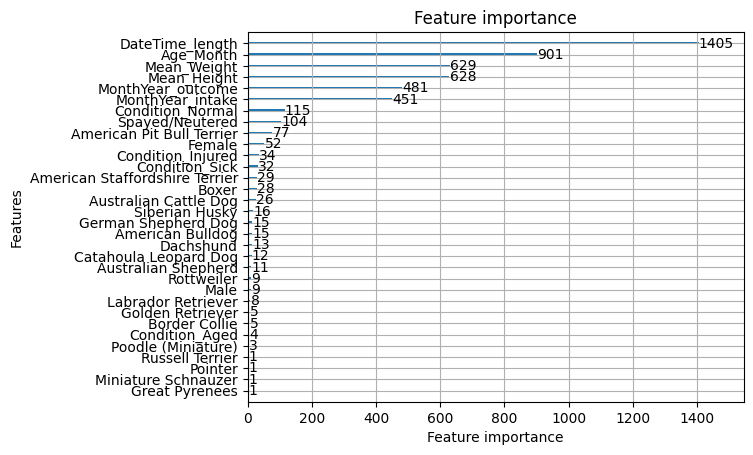

In [167]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

# feature_importances_
lgbm.feature_importances_
labels = {col_idx: data_df.columns[col_idx] for col_idx in range(len(lgbm.feature_importances_))}
labels

# axes
ax = plot_importance(lgbm)

# ytick_labels
ytick_labels = ax.get_yticklabels()
ytick_labels = [labels[int(text.get_text().split("_")[1])] for text in ytick_labels]
ytick_labels

# set_yticklabels
ax.set_yticklabels(ytick_labels)
plt.show()

- https://lightgbm.readthedocs.io/en/latest/_modules/lightgbm/plotting.html#plot_importance
- https://matplotlib.org/stable/api/axes_api.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.get_yticklabels.html
- https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text

# Over Sampling

## targets

In [168]:
targets = data_df["Outcome_Type"]

## features

In [169]:
features = data_df.drop("Outcome_Type", axis=1)

### Scaling
- 전처리 중 이상치 제거를 하지 않았기 때문에 이상치에 영향을 덜 받는다고 알려진 RobustScaler를 사용

In [170]:
from sklearn.preprocessing import RobustScaler

rob = RobustScaler()
features = rob.fit_transform(features)

## train, test 나누기

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, stratify=targets, random_state=2023)

In [183]:
print(features.shape, targets.shape)

(19996, 303) (19996,)


## Train데이터에 Over Sampling 적용

In [172]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2023)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [184]:
print(X_resampled.shape, y_resampled.shape)

(25784, 303) (25784,)


## Optuna

In [173]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
import numpy as np
import lightgbm
import optuna

def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=2023)
    dtrain = lightgbm.Dataset(train_x, label=train_y)

    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "random_state": 2023,
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1e-1),
        "n_estimators": trial.suggest_int("n_estimators", 100, 3000),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lightgbm.train(param, dtrain)
    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)
    return accuracy

In [174]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-06-20 14:07:21,272] A new study created in memory with name: no-name-f6d594fa-1d64-4c92-aab2-dac4e9326258
[I 2023-06-20 14:07:56,229] Trial 0 finished with value: 0.9722078593588418 and parameters: {'learning_rate': 0.0155153842594156, 'n_estimators': 1160, 'lambda_l1': 2.2624002813693758, 'lambda_l2': 1.0297139167303455, 'num_leaves': 134, 'feature_fraction': 0.9785001995177212, 'bagging_fraction': 0.4669433876472539, 'bagging_freq': 5, 'min_child_samples': 6}. Best is trial 0 with value: 0.9722078593588418.
[I 2023-06-20 14:08:21,488] Trial 1 finished with value: 0.9720785935884177 and parameters: {'learning_rate': 0.06030849515216944, 'n_estimators': 2017, 'lambda_l1': 1.9871568354843286e-08, 'lambda_l2': 1.8303780723031468e-07, 'num_leaves': 177, 'feature_fraction': 0.5184098881491952, 'bagging_fraction': 0.8807851994697711, 'bagging_freq': 6, 'min_child_samples': 38}. Best is trial 0 with value: 0.9722078593588418.
[I 2023-06-20 14:08:29,205] Trial 2 finished with value: 0

Number of finished trials: 100
Best trial:
  Value: 0.9759565667011375
  Params: 
    learning_rate: 0.05354694776444636
    n_estimators: 387
    lambda_l1: 0.0019211264865576477
    lambda_l2: 0.0001424747642040878
    num_leaves: 84
    feature_fraction: 0.7881491823725136
    bagging_fraction: 0.5816984666143453
    bagging_freq: 1
    min_child_samples: 5


## Model 훈련

In [178]:
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=2023)
train_data = lightgbm.Dataset(X_train, label=y_train)
eval_data = (X_valid, y_valid)

param = {
    "objective": "binary",
    "metric": "balanced_accuracy",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": 2023,
    "n_estimators": trial.params["n_estimators"],
    "learning_rate": trial.params["learning_rate"],
    "lambda_l1": trial.params["lambda_l1"],
    "lambda_l2": trial.params["lambda_l2"],
    "num_leaves": trial.params["num_leaves"],
    "feature_fraction": trial.params["feature_fraction"],
    "bagging_fraction": trial.params["bagging_fraction"],
    "bagging_freq": trial.params["bagging_freq"],
    "min_child_samples": trial.params["min_child_samples"],
}
lgbm = LGBMClassifier(**param)
lgbm.fit(X_train, y_train, eval_set=eval_data)

[LightGBM] [Warning] lambda_l1 is set=0.0019211264865576477, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0019211264865576477
[LightGBM] [Warning] bagging_fraction is set=0.5816984666143453, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5816984666143453
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7881491823725136, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7881491823725136
[LightGBM] [Warning] lambda_l2 is set=0.0001424747642040878, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001424747642040878


LGBMClassifier(bagging_fraction=0.5816984666143453, bagging_freq=1,
               feature_fraction=0.7881491823725136,
               lambda_l1=0.0019211264865576477, lambda_l2=0.0001424747642040878,
               learning_rate=0.05354694776444636, metric='balanced_accuracy',
               min_child_samples=5, n_estimators=387, num_leaves=84,
               objective='binary', random_state=2023, verbosity=-1)

## 예측

In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba_po=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba_po)

    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

In [180]:
# 예측
preds = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:,1]

# 평가
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[ 272  202]
 [  92 5433]]
정확도: 0.9510, 정밀도: 0.9642, 재현율: 0.9833, F1: 0.9737, AUC: 0.9352


## feature_importance 시각화

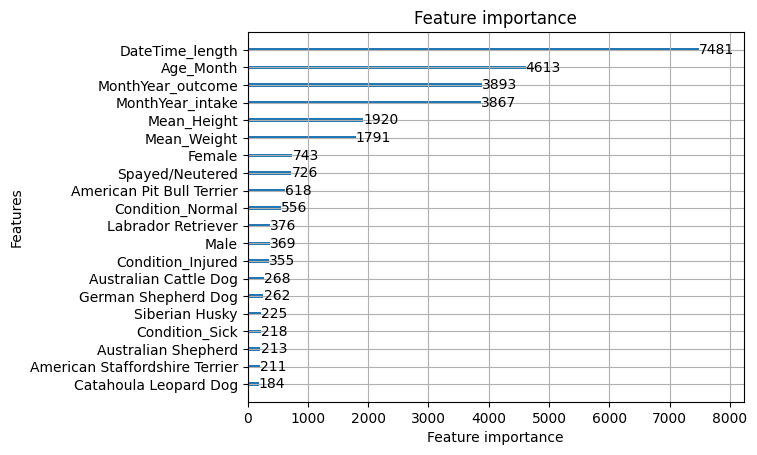

In [182]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

# feature_importances_
lgbm.feature_importances_
labels = {col_idx: data_df.columns[col_idx] for col_idx in range(len(lgbm.feature_importances_))}
labels

# axes
ax = plot_importance(lgbm, max_num_features=20)

# ytick_labels
ytick_labels = ax.get_yticklabels()
ytick_labels = [labels[int(text.get_text().split("_")[1])] for text in ytick_labels]
ytick_labels

# set_yticklabels
ax.set_yticklabels(ytick_labels)
plt.show()

# Regression

## features, targets 나누기

### targets

In [ ]:
targets = data_df["DateTime_length"]

In [ ]:
targets

### features

In [ ]:
features = data_df.drop("DateTime_length", axis=1)
features

#### Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

rob = RobustScaler()
features = rob.fit_transform(features)

## train, test 나누기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=2023)

## LazyPredict

In [ ]:
from lazypredict.Supervised import LazyRegressor

lazy_reg = LazyRegressor(verbose=1, predictions=True)
models, predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)

In [ ]:
models